# Lab 7: Non-negative Matrix Factorization

The goal of this lab session is to code a NMF algorithm and use it in some applications.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

## NMF

Non-negative Matrix Factorization is a model where a matrix V is factorized into two matrices W and H, with the property that all three matrices have no negative elements. This non-negativity makes the resulting matrices easier to interpret.

Fill in the following class that implements a NMF by multiplicative updates using the Frobenius norm or the Kullback-Leiber divergence as loss function (implement both), you can add more methods if needed. Try 10 different random initializations and choose the best one.

In [58]:
class my_NMF():
    
    def __init__(self, n_components, loss, epsilon, reg=False, seed=0, max_iter=500, mu=1., lambd=1., nu=1.):
        '''
        Attributes:
        
        n_components_ : integer
            the unknown dimension of W and H
        max_iter_: integer
            maximum number of iterations
        epsilon_: float
            criterion for convergence
        loss_ : str
                {"Frobenius", "KL"}
        seed : int
               random seed
        reg : bool
              True if you want to use regularization
        W_: np.array
            W Matrix factor
        H_: np.array
            H Matrix factor
        '''
        np.random.seed(seed)
        self.n_components_ = n_components
        self.max_iter_ = max_iter
        self.loss_ = loss
        self.epsilon_ = epsilon
        self.W_ = None
        self.H_ = None
        self.reg = reg
        self.mu = mu
        self.lambd = lambd
        self.nu = nu

    def fit_transform(self, X):
        """ Find the factor matrices W and H
        
        Parameters:
        -----------
        X: (n, p) np.array
            Data matrix
        
        Returns:
        -----
        self
        """        
        # initialize both matrices
        nrows, ncolumns = X.shape
        self.W_, self.H_ = np.random.rand(nrows, self.n_components_),\
                           np.random.rand(self.n_components_, ncolumns)
        if self.loss_ is 'Frobenius':
            if self.reg:
                return self.fit_transform_frobenius_regularized(X)
            else:
                return self.fit_transform_frobenius(X)
        if self.loss is 'KL':
            return self.fit_transform_KL(X)
    
    def fit_transform_frobenius(self, X):
        i = 0
        while(not (self.convergence(X, self.W_, self.H_))) and  i < self.max_iter_:
            # Updating W
            numerator = X @ self.H_.T
            denumerator = self.W_ @ self.H_ @ self.H_.T
            update_factor = np.divide(numerator, denumerator)
            self.W_ = np.multiply(self.W_, update_factor)
            
            # Updating H
            numerator = self.W_.T @ X
            denumerator = self.W_.T @ self.W_ @ self.H_
            update_factor = np.divide(numerator, denumerator)
            self.H_ = np.multiply(self.H_, update_factor)
            i += 1
        return self
    
    def fit_transform_frobenius_regularized(self, X):
        i = 0
        while(not (self.convergence(X, self.W_, self.H_))) and  i < self.max_iter_:
            # Updating W
            numerator = X @ self.H_.T
            denumerator = self.W_ @ (self.H_ @ self.H_.T + self.mu * np.identity(self.n_components_) )
            update_factor = np.divide(numerator, denumerator)
            self.W_ = np.multiply(self.W_, update_factor)
            
            # Updating H
            numerator = self.W_.T @ X - self.lambd * np.ones((self.n_components_, X.shape[1]))
            denumerator = (self.W_.T @ self.W_ + self.nu * np.identity(self.n_components_)) @ self.H_
            update_factor = np.divide(numerator, denumerator)
            self.H_ = np.multiply(self.H_, update_factor)
            i += 1
        return self
    
    def fit_transform_KL(self, X):
        i = 0
        while(not (self.convergence(X, self.W_, self.H_))) and  i < self.max_iter_:
            # Updating W
            W_rows, W_cols = self.W_.shape
            self.KL_update_W(X, W_rows, W_cols)
            
            # Updating H
            H_rows, H_cols = self.H_.shape
            self.KL_update_H(X, H_rows, H_cols)
            i += 1
        return self
            
    
    def KL_update_W(self, X, wr, wc):
        X_ = np.divide(X, self.W_ @ self.H_)
        for i in range(wr):
                for j in range(wc):
                    self.W_[i][j] = self.W_[i][j] * ((self.H_[j] @ X_[i]) / sum(self.H_[j]))
        return self
    
    def KL_update_H(self, X, hr, hc):
        X_ = np.divide(X, self.W_ @ self.H_)
        for i in range(wr):
                for j in range(wc):
                    self.H_[i][j] = self.H_[i][j] * ((self.W_[:,i] @ X_[:,j]) / sum(self.H_[:,i]))
        return self

    
    def convergence(self, X, W, H):
        norm = np.linalg.norm(X - np.dot(W,H))
        return norm < self.epsilon_
    
    def inverse_transform(self, embedding):
        """ Maps an embedding matrix into the original space. 
        
        Parameters:
        -----------
        embedding : (n, r) np.array
                     Embedding matrix
        
        Returns:
        -----
        data_hat : (n, p) np.array  
                   reconstructed data matrix
        """       
        
        data_hat = np.dot(self.W_, self.H_)
        return data_hat
    
    def transform(self, X):
        """Transform the data X according to the fitted NMF model / implementation only for Frobenius
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape (n_samples, n_features)
            Data matrix to be transformed by the model
        Returns
        -------
        W : array, shape (n_samples, n_components)
            Transformed data
        """
        nrows, ncolumns = X.shape
        W = np.random.rand(nrows, self.n_components_)
        i = 0
        while(not (self.convergence(X, W, self.H_))) and  i < self.max_iter_:
            # Updating W
            numerator = X @ self.H_.T
            denumerator = W @ self.H_ @ self.H_.T
            update_factor = np.divide(numerator, denumerator)
            W = np.multiply(W, update_factor)
            i += 1
        return W

<>:52: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:57: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:52: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:57: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-58-95c3630629bc>:52: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.loss_ is 'Frobenius':
<ipython-input-58-95c3630629bc>:57: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.loss is 'KL':


## Applications

### First application

For the first application you are going to analyse the following data to give an interpretation of the factorization:

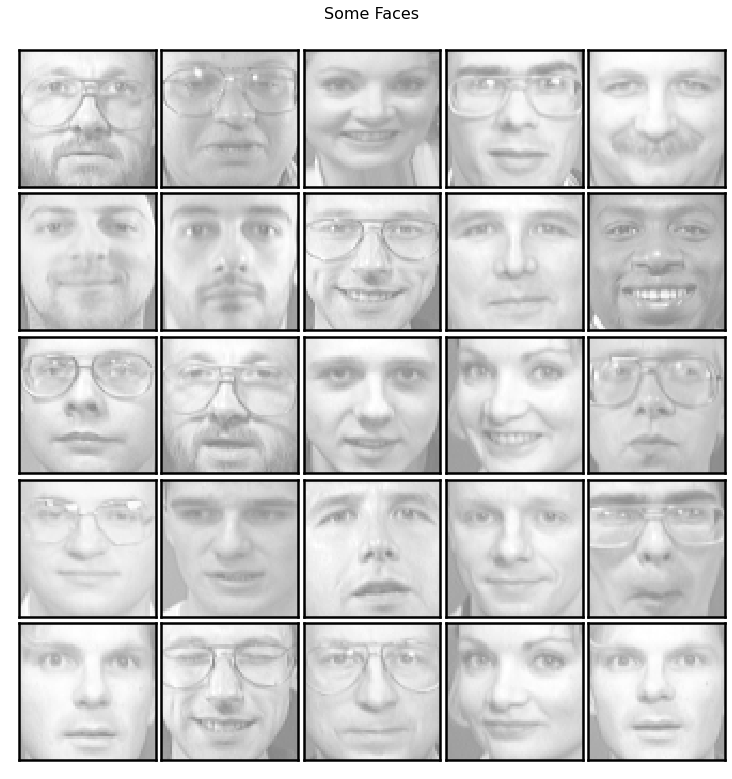

In [98]:
from sklearn.datasets import fetch_olivetti_faces


dataset = fetch_olivetti_faces(shuffle=True)

faces = dataset.data  # n = 400 flattened images of p = 4096 = 64 x 64
image_shape = (64, 64)

n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

def plot_gallery(images, image_shape, title='', cmap=plt.cm.gray):
    
    # fit the nb of images into a square
    n_images = len(images)
    nrows = int(np.ceil(np.sqrt(n_images)))
    ncols = nrows
    
    # instantiate figure
    fig, axes = plt.subplots(nrows, ncols, figsize=(2. * ncols, 2.26 * nrows))
    fig.suptitle(title, size=16)
    
    axes_for_display = axes.flatten()[:n_images]
    axes_to_blank = axes.flatten()[n_images:]
    
    for idx, comp in enumerate(images):
        ax = axes_for_display[idx]
        vmax = max(comp.max(), -comp.min())
        ax.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        ax.set(xticks=(),
               yticks=())
        
    for ax in axes_to_blank:
        ax.axis('off')

    fig.tight_layout()
    fig.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)  # insert space below the suptitle
    

plot_gallery(title="Some Faces", 
             images=faces[:25], 
             image_shape=image_shape)

Apply your NMF algorithm for this dataset and plot the approximated face pictures.

In [17]:
seeds = np.arange(0,20,2)
norm = []
for seed in seeds:
    matrix_facto = my_NMF(361, "Frobenius", 10, seed=seed)
    matrix_facto.fit_transform(faces)
    W, H = matrix_facto.W_, matrix_facto.H_
    norm.append(np.linalg.norm(faces - W @ H))

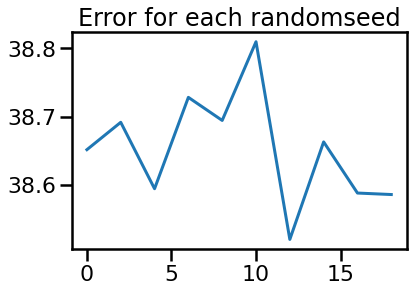

In [19]:
plt.plot(seeds, norm)
plt.title('Error for each randomseed')
plt.show()

**There is no interpretation of that, for seed = 12, we have the best approximation of X, so we are going to take seed = 12 for the next of our project. We can see that initialisation plays a role in the accuracy of the algorithm**

In [105]:
nmf = my_NMF(25, "Frobenius", 10, seed=12)
nmf.fit_transform(faces)
W, H = nmf.W_, nmf.H_

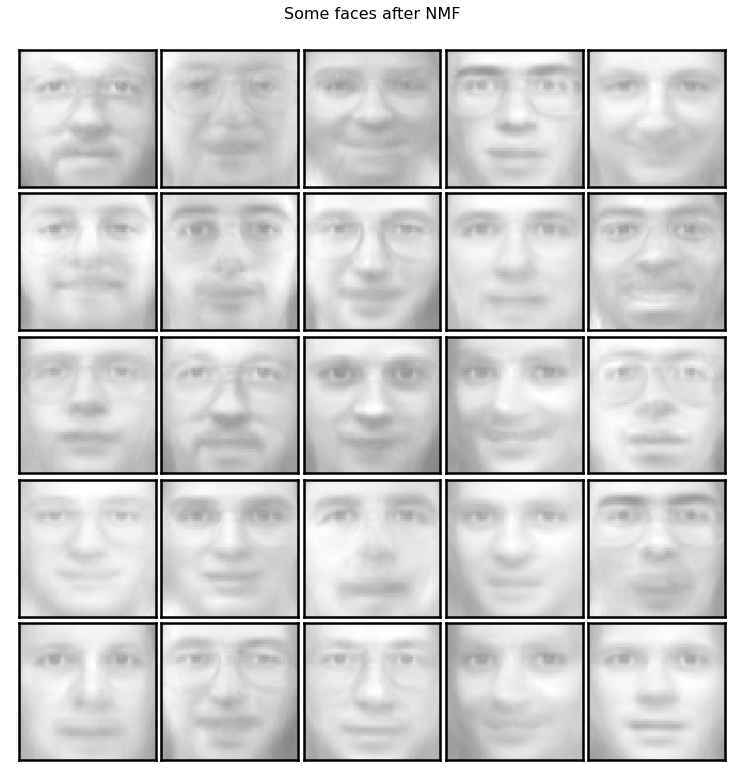

In [106]:
plot_gallery((W @ H)[:25], image_shape, "Some faces after NMF")

**As we can see, we have approximately the same faces as there were in the original matrix. This shows that the algorithm works quite well, we had computed a good approximation of the original matrix**

- Plot the $W$ matrix as images in a $(\sqrt{r}, \sqrt{r})$ grid
- Choose one face, plot its corresponding weights (in $H$) in a grid  and explain the interpretation of both factor matrices.

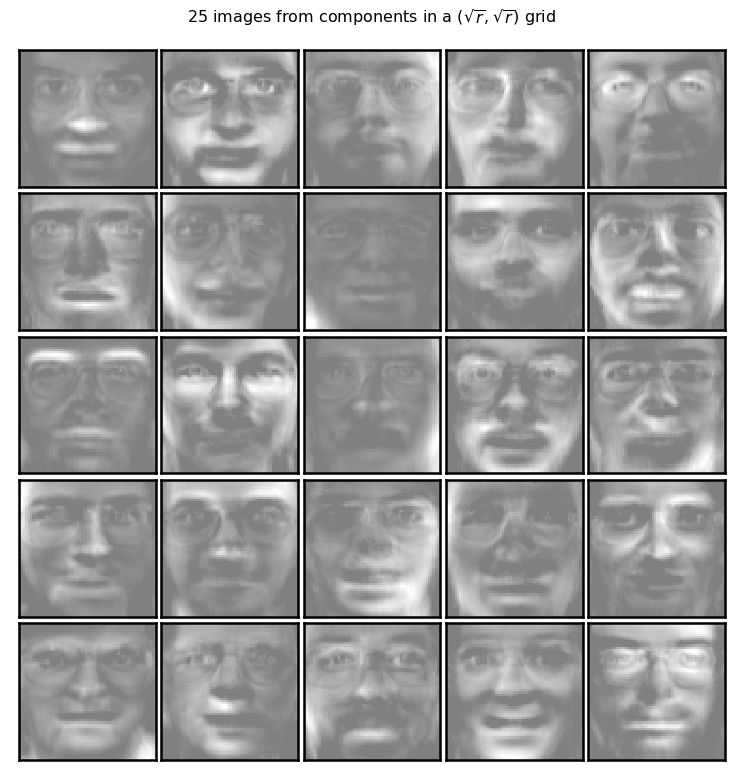

In [114]:
plot_gallery(H, (64,64), "25 images from components in a $(\sqrt{r}, \sqrt{r})$ grid")

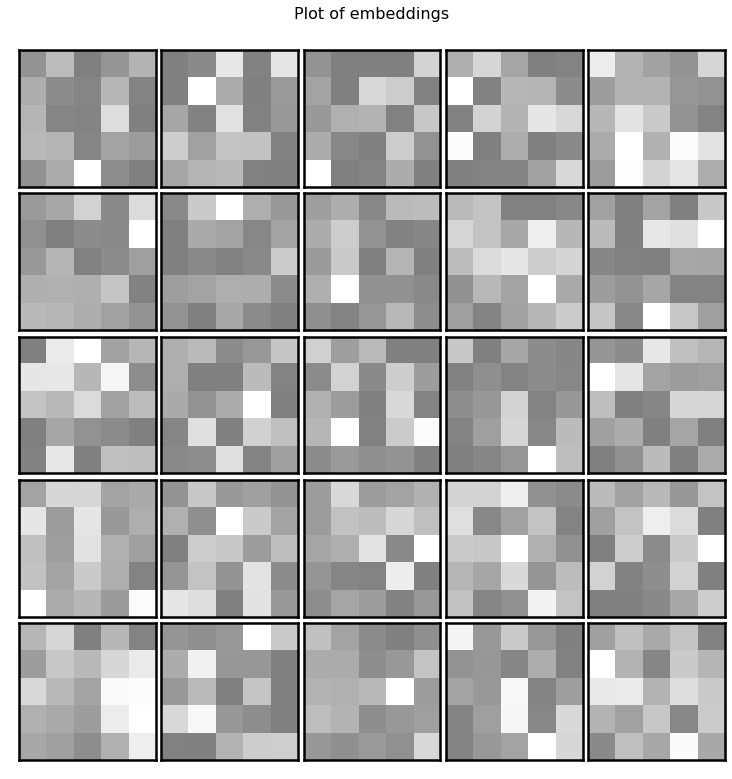

In [115]:
plot_gallery(title = 'Plot of embeddings', images = W[:25], image_shape = (5, 5))

Each of the original faces will be approximated by a combination of the faces in matrix H (components matrix). The coeficients are given by each line of the matrix W (embeddings). The more the pixel is bright, the more we give weight to the corresponding face in matrix H.

For instance, if the embedding plot shows one really bright pixel, and the others are rather black/grey, it means that the corresponding initial image is very close to the corresponding component.

In [116]:
nmf = my_NMF(121, "Frobenius", 10, seed=12)
nmf.fit_transform(faces)
W, H = nmf.W_, nmf.H_

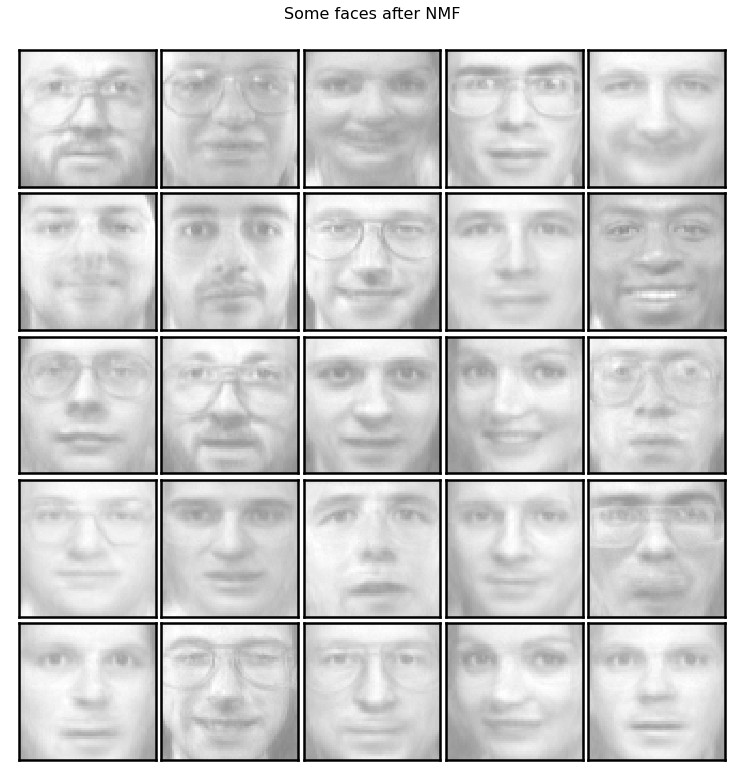

In [118]:
plot_gallery((W @ H)[:25], image_shape, "Some faces after NMF")

**With r=100, we can notive that we have better faces, What I mean by that is that we have a better approximation of x by W & H .. Which is normal because r is close to the real number of image (400).

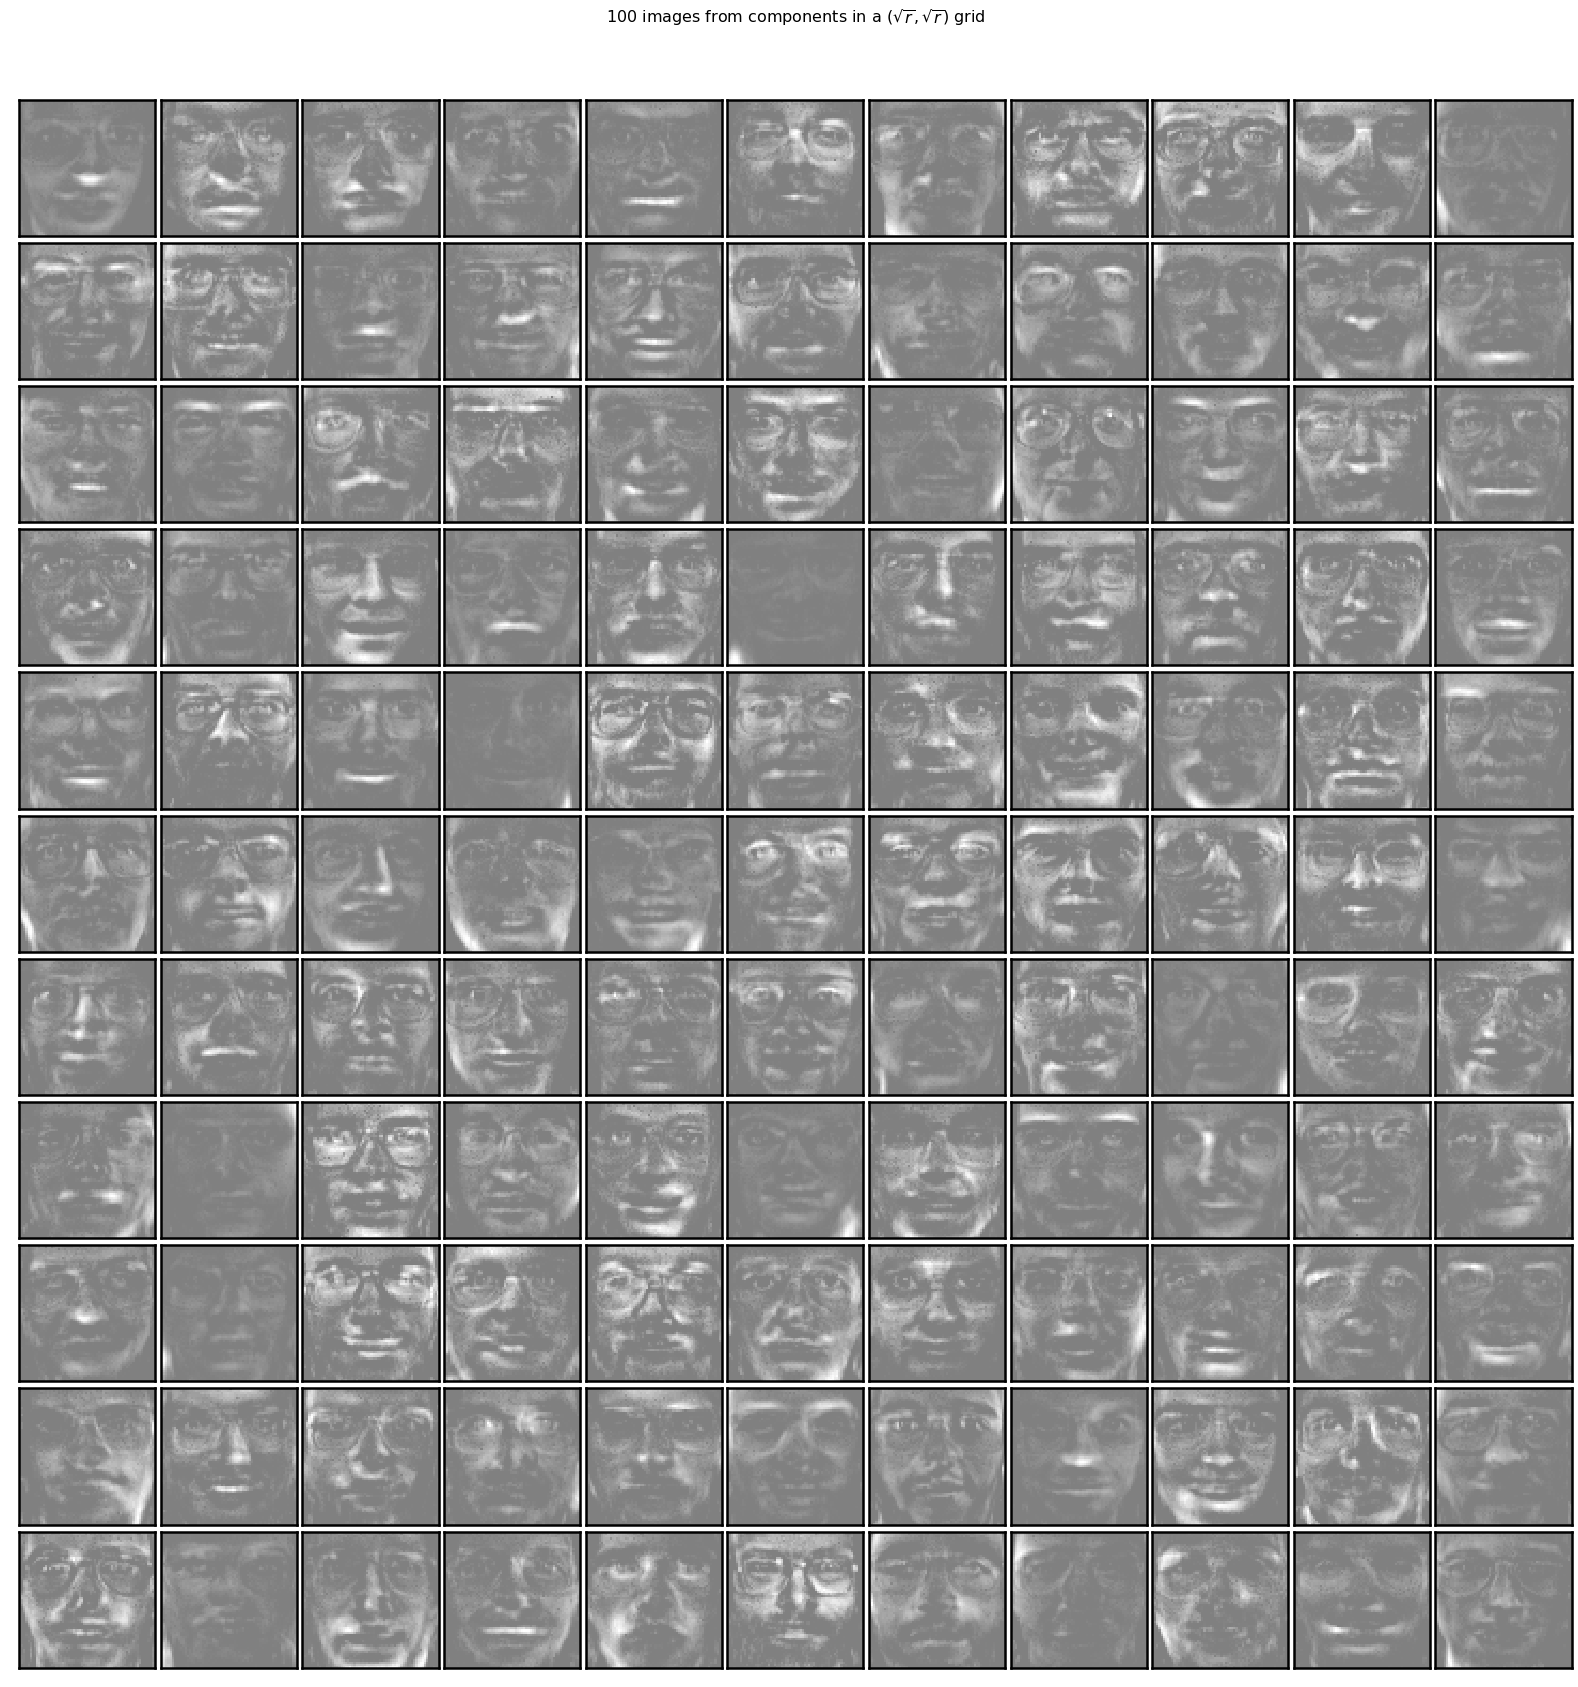

In [117]:
plot_gallery(H, (64,64), "100 images from components in a $(\sqrt{r}, \sqrt{r})$ grid")

**In addition, we can see more seperate classes in the components (only a part of the face is bright,  not the entire face, unlike some of the components for r=25). Which means that each of the components has a unique job of retranscripting one part of the face.**

### Second application

Import the 20newsgroups dataset (from sklearn.datasets import fetch_20newsgroups_vectorized) that contains a collection of ~18,000 newsgroup documents from 20 different newsgroups.

Model the topics present in a subsample with NMF. Print the most common words of each topic.

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [91]:
n_samples = 2000
n_features = 1000
n_top_words = 30

def print_top_words(D, feature_names, n_top_words):
    p, r = D.shape
    for topic_idx in range(r):
        topic = D[:, topic_idx]
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print()
    print()


dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))
data_samples = dataset.data[:n_samples]


# Use tf-idf features for NMF.
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data_samples)

# Fitting the NMF model
model = NMF(n_components=10, random_state=0, max_iter=800)
W_nlp = model.fit_transform(tfidf)
H_nlp = model.components_

# Get the feature names
feature_names = tfidf_vectorizer.get_feature_names()

In [92]:
# Printing the 20 top words of each topic 
print_top_words(H_nlp.T, feature_names, n_top_words)

Topic #0: just people don think like know say did make really time way ve right sure good going want got wrong said things didn ll course look point let thing probably

Topic #1: windows use using window dos program application os drivers software help screen running ms code motif pc work ve mode display looking graphics version machine manager programs unix package printer

Topic #2: god jesus bible faith does christian christians christ believe life heaven sin lord church religion true mary human belief love atheism man fact says people children good say law father

Topic #3: thanks know does mail advance hi info interested anybody email like looking help appreciated card information list send need post wondering video don newsgroup reply address buying tell site new

Topic #4: car new 00 bike 10 price space cars power sale good year engine years used cost miles condition great 000 old buy tires insurance 12 speed 15 sell like oil

Topic #5: edu soon com send university internet ftp 

In [15]:
new_data_sample = dataset.data[2036]  # unseen
print(new_data_sample)


Didn't Paul write that if the Resurrection is not true, we are the
biggest fools of all?  However, whether you believe in Christ or not,
His teachings (e.g. love your brotherman as yourself), even if only 
followed at a secular level, could do a great deal to alleviate some of 
the problems we see today in the world.  Even when I was a rabid atheist 
I couldn't deny that.


In [48]:
new_data_matrix = tfidf_vectorizer.transform([dataset.data[2036]])
print(f"The NMF best associates this sentence to the topic number {np.argmax(model.transform(new_data_matrix))}")

The NMF best associates this sentence to the topic number 2


**We can notice that the topic 2 is the only topic that deals with religion (according to the top words), which makes sense when we see that the NMF associates the sentence with the topic 2 since the sentence is about religion.**

In [54]:
new_data_sample = """So far, I always wanted to be a data scientist, coding was always something that I love. 
When I was a child, I was always on my computer playing coding games."""  # unseen II
print(new_data_sample)

So far, I always wanted to be a data scientist, coding was always something that I love. 
When I was a child, I was always on my computer playing coding games.


In [56]:
new_data_matrix = tfidf_vectorizer.transform([new_data_sample])
print(f"The NMF best associates this sentence to the topic number {np.argmax(model.transform(new_data_matrix))}")

The NMF best associates this sentence to the topic number 7


**Unfortunately this is not the good topic, juste because there was the word "games" in the sentence, it directly associates it with the topic number 7 .. It fails to capture dependecy with other words (and therefore the context), which is one of the major drawbacks of all the embeding techniques related to the bag of words.**